<a href="https://colab.research.google.com/github/lucasnserra/CustomerSegmentation/blob/main/Time_Cohorts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###El Conjunto de datos es una muestra aleatoria compuesta por medio millon de transacciones de datos minoristas en linea extraidas del UCI





In [89]:
#Importo Librerias
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#Cargo el dataset del Raw en git y determino como columna de fechas InvoiceDate para que datetime funcione
online = pd.read_csv('https://raw.githubusercontent.com/lucasnserra/CustomerSegmentation/main/online.csv',parse_dates=['InvoiceDate'])
online.head()
## Las columnas principales son InvoiceDate, UnitPrice y CustomerID

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [91]:
 #Creo funcion para obtener primer dia del mes
def get_day(x): 
  return dt.datetime(x.year,x.month,1) #return dt.datetime(x.year,x.month,1) 

In [92]:
#Creo la comlumna de día 
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day)
#agrupo InvoiceDay por CostumerID 
grouping = online.groupby('CustomerID')['InvoiceDay']
#Le asigno el minimo a cada cliente de su compra
online['CohortMonth'] = grouping.transform('min') 
online.head(5)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [93]:
#Creo funcion para calcular el tiempo entre la fecha de alta y la fecha de la transaccion 
def get_date_int(df,column):
  year = df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  return year,month,day

In [94]:
#Extraigo componentes de la fecha de la factura 
invoice_year, invoice_month, invoice_day = get_date_int(online,'InvoiceDate')
#Extraigo componentes de la fecha de cohort 
cohort_year, cohort_month, cohort_day = get_date_int(online,'CohortMonth')

In [95]:
#Calculo diferencia entre años
years_diff = invoice_year - cohort_year
#Calculo diferencia entre Meses
months_diff = invoice_month - cohort_month
#Creo Index en dataset con la suma de la cantidad de dias calculados previamente
online['CohortIndex'] = years_diff *12+ months_diff + 1  #Se suma 1 para que el primer mes en vez de ser 0 marque 1 

In [96]:
# Creo una tabla pivotante para corroborar como queda el Cohort por tiempo (Clientes activos a traves de los meses de ese cohort) 
grouping = online.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique) #Cuento clientes unicos aperturado por cohort y meses porteriores 
cohort_data = cohort_data.reset_index()
cohort_data['CohortMonth'] = cohort_data['CohortMonth'].dt.strftime('%Y-%m') # Cambio formato de fecha para que se visualice mejor 
cohort_counts = cohort_data.pivot(index = 'CohortMonth',columns = 'CohortIndex',values= 'CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#Calculo de Metrica de retencion "Retention Rate" // Porcentaje de clientes activos
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes,axis=0)
retention.round(3) * 100


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
#Metrica de Cantidad de productos vendidos promedio por mes 
cohort_data2 = grouping['Quantity'].mean().reset_index()
average_quantity = cohort_data2.pivot(index= 'CohortMonth',columns= 'CohortIndex',values='Quantity')
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


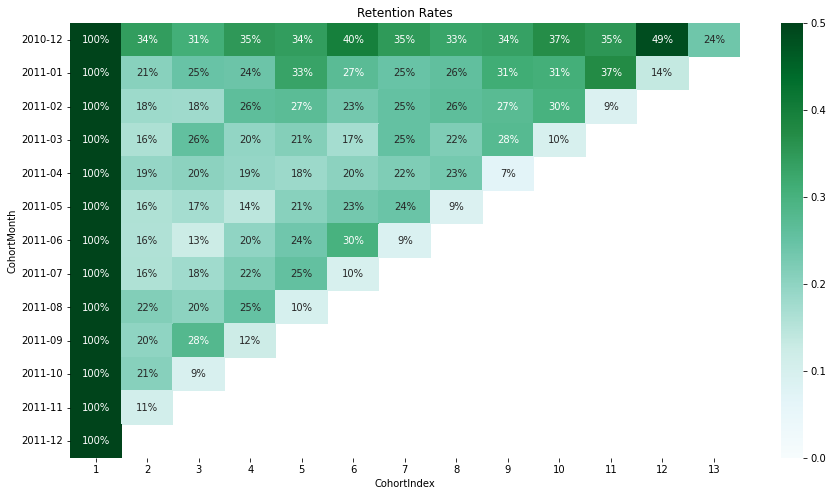

In [99]:
#Visualizacion del Cohort Se puede 
plt.figure(figsize=(15,8))
plt.title('Retention Rates')
sns.heatmap(data= retention,annot=True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()